# <center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>


## **<center>Machine Learning Advanced: CONCRETE COMPRESSIVE STRENGHT PREDICTION</center>**

<a name = Section2></a>
# **Problem Statement**
---

The current process suffers from the following problems:

- The company is under a time crunch to test the compressive strength of the concrete to release in the market.

- Previously they were using manual methods to test the compressive strength of the concrete which is very time-consuming and inefficient.

### Importing all required libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn import metrics

### Dataset Feature Description
The Dataset contains the following columns:

||Column Name|Description|
|:--|:--|:--|
||**Id**| Unique identity of each observation. |
||**cement**| Quantity of cement in the mixture in kg(kilogram). |
||**slag**| Quantity of cement in the mixture in kg(kilogram). |
||**Flyash**| Quantity of fly ash in the mixture in kg(kilogram). |
||**water**| Quantity of water in the mixture in kg(kilogram).|
||**superplasticizer**| Quantity of superplasticizer in the mixture in kg(kilogram). |
||**coarseaggregate**| Quantity of coarse aggregate in the mixture in kg(kilogram). |
||**fineaggregate**| Quantity of fine aggregate in the mixture in kg(kilogram). |
||**age**| Age of the mixture in days.|
||**csMPa**| compressive strength of concrete in MPa(dependent variable).|

In [3]:
train=pd.read_csv('concrete_train.csv')
train.head()

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28,27.68
1,507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28,62.05
2,334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3,23.80
3,848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28,33.40
4,294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3,7.40


<a name = Section41></a>
### **Data Info, Data Description and Null Value Checking**

- In this section we will get **description** and **statistics** about the data.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                824 non-null    int64  
 1   cement            824 non-null    float64
 2   slag              824 non-null    float64
 3   flyash            824 non-null    float64
 4   water             824 non-null    float64
 5   superplasticizer  824 non-null    float64
 6   coarseaggregate   824 non-null    float64
 7   fineaggregate     824 non-null    float64
 8   age               824 non-null    int64  
 9   csMPa             824 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 64.5 KB


In [6]:
train[train.duplicated()]

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,824.0,513.847087,296.786779,0.00,251.750,513.50,770.2500,1028.0
cement,824.0,283.360801,107.536404,102.00,192.000,275.10,359.9000,540.0
slag,824.0,74.371602,86.977784,0.00,0.000,22.00,144.7750,359.4
flyash,824.0,53.160801,64.000646,0.00,0.000,0.00,118.3000,195.0
water,824.0,181.797087,21.321905,121.80,164.900,185.35,192.0000,247.0
superplasticizer,824.0,6.163956,5.967258,0.00,0.000,6.10,10.1250,32.2
coarseaggregate,824.0,973.548544,78.694630,801.00,932.000,968.00,1040.6000,1145.0
fineaggregate,824.0,772.107403,80.984717,594.00,726.775,778.50,821.2500,992.6
age,824.0,44.661408,60.475702,1.00,12.250,28.00,56.0000,365.0
csMPa,824.0,35.857864,16.865099,2.33,23.685,34.08,45.8625,82.6


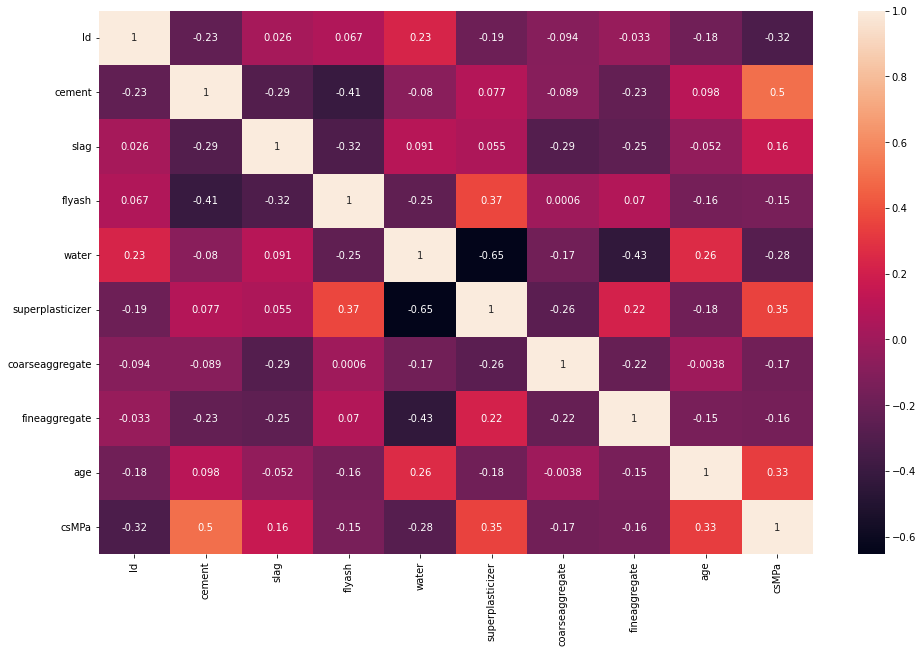

In [11]:
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [14]:
for col in train.columns:
    print('Column ',col,'  ',train[col].nunique())

Column  Id    824
Column  cement    254
Column  slag    166
Column  flyash    130
Column  water    179
Column  superplasticizer    105
Column  coarseaggregate    258
Column  fineaggregate    274
Column  age    14
Column  csMPa    701


In [15]:
#Drop ID column
train.drop(columns=['Id'],inplace=True)

In [17]:
#Splitting data into X andy
X=train.drop('csMPa',axis=1)
y=train['csMPa']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [19]:
#Scaling the data
ss=StandardScaler()
X_train_scale=pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_test_scale=pd.DataFrame(ss.fit_transform(X_test),columns=X_test.columns)

In [22]:
models=[LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),SVR()]

In [30]:
rmse = []
for model in models:
    cv = cross_val_score(model, X_train_scale, y_train, scoring='neg_mean_squared_error', cv=10).mean()
    rmse.append(np.sqrt(cv))
    
modelname = ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','RandomForestRegressor','SVR']

score = pd.DataFrame({'Model': modelname, 'RMSE': rmse})
score.style.background_gradient(high=1,axis=0)

,Model,RMSE
0,LinearRegression,nan
1,KNeighborsRegressor,nan
2,DecisionTreeRegressor,nan
3,RandomForestRegressor,nan
4,SVR,nan


In [32]:
lr=LinearRegression()
lr.fit(X_train_scale,y_train)
lr_pred=lr.predict(X_test_scale)

<AxesSubplot:xlabel='csMPa'>

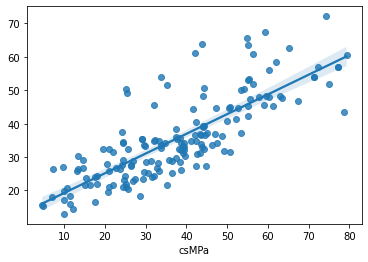

In [33]:
sns.regplot(y_test,lr_pred)

In [37]:
MAE = metrics.mean_absolute_error(y_test, lr_pred)   
print('MAE is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, lr_pred)
print('MSE for test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, lr_pred))
print('RMSE for test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,lr_pred)
print("R2 score for test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for test set is {}".format(adj_r_squared))

MAE is 8.482702654472687
MSE for test set is 108.116250815065
RMSE for test set is 10.397896461066777
R2 score for test set is 0.6289269601941523
Adjusted R2 score for test set is 0.6098975735374421


In [38]:
dt=DecisionTreeRegressor()
dt.fit(X_train_scale,y_train)
dt_pred=dt.predict(X_test_scale)

<AxesSubplot:xlabel='csMPa'>

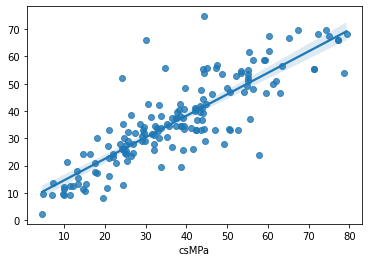

In [39]:
sns.regplot(y_test,dt_pred)

In [40]:
MAE = metrics.mean_absolute_error(y_test, dt_pred)   
print('MAE is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, dt_pred)
print('MSE for test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, dt_pred))
print('RMSE for test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,dt_pred)
print("R2 score for test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for test set is {}".format(adj_r_squared))

MAE is 6.290424242424243
MSE for test set is 84.05713727272727
RMSE for test set is 9.168267953802793
R2 score for test set is 0.7115018583235767
Adjusted R2 score for test set is 0.6967070818273499


In [41]:
rf=RandomForestRegressor()
rf.fit(X_train_scale,y_train)
rf_pred=rf.predict(X_test_scale)

<AxesSubplot:xlabel='csMPa'>

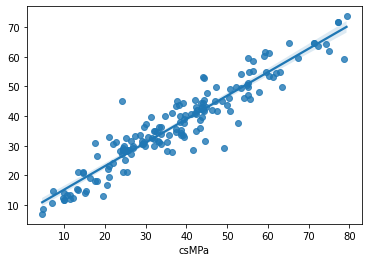

In [42]:
sns.regplot(y_test,rf_pred)

In [43]:
MAE = metrics.mean_absolute_error(y_test, rf_pred)   
print('MAE is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, rf_pred)
print('MSE for test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, rf_pred))
print('RMSE for test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,rf_pred)
print("R2 score for test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for test set is {}".format(adj_r_squared))

MAE is 4.495509357864358
MSE for test set is 34.89270751004095
RMSE for test set is 5.907004952600002
R2 score for test set is 0.8802423970014036
Adjusted R2 score for test set is 0.8741009814630141


In [44]:
knn=KNeighborsRegressor()
knn.fit(X_train_scale,y_train)
knn_pred=knn.predict(X_test_scale)

<AxesSubplot:xlabel='csMPa'>

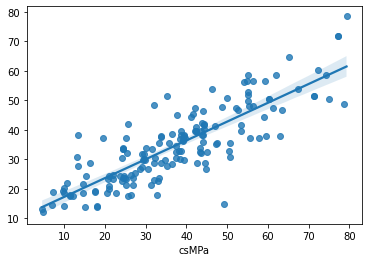

In [45]:
sns.regplot(y_test,knn_pred)

In [46]:
MAE = metrics.mean_absolute_error(y_test, knn_pred)   
print('MAE is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, knn_pred)
print('MSE for test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, knn_pred))
print('RMSE for test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,knn_pred)
print("R2 score for test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for test set is {}".format(adj_r_squared))

MAE is 7.293830303030303
MSE for test set is 95.07897466666667
RMSE for test set is 9.750844818099951
R2 score for test set is 0.6736730705587224
Adjusted R2 score for test set is 0.6569383562284005


In [47]:
svr=SVR()
svr.fit(X_train_scale,y_train)
svr_pred=svr.predict(X_test_scale)

<AxesSubplot:xlabel='csMPa'>

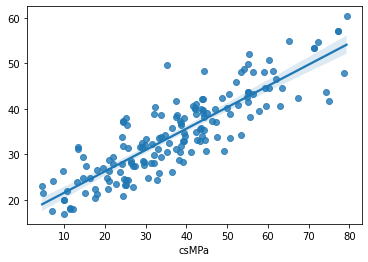

In [48]:
sns.regplot(y_test,svr_pred)

In [49]:
MAE = metrics.mean_absolute_error(y_test, svr_pred)   
print('MAE is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, svr_pred)
print('MSE for test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, svr_pred))
print('RMSE for test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,svr_pred)
print("R2 score for test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for test set is {}".format(adj_r_squared))

MAE is 8.347167914872353
MSE for test set is 111.99548536779052
RMSE for test set is 10.582791945785882
R2 score for test set is 0.6156127789610091
Adjusted R2 score for test set is 0.5959006137795224


#### Among all models RandomForestRegressor gave best RMSE value. Let me try with RandomizedSearchCV

In [50]:
from sklearn.model_selection import RandomizedSearchCV
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf
}

In [52]:
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid, cv=5, n_iter=10,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train_scale,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [53]:
# Display the best estimator
print(rf_randomcv.best_estimator_)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=400)


In [54]:
# Display the best score
print(rf_randomcv.best_score_)

0.8664433665826146


In [55]:
best_random_grid=rf_randomcv.best_estimator_

In [56]:
from sklearn.metrics import accuracy_score
rf_rscv_pred=best_random_grid.predict(X_test_scale)

<AxesSubplot:xlabel='csMPa'>

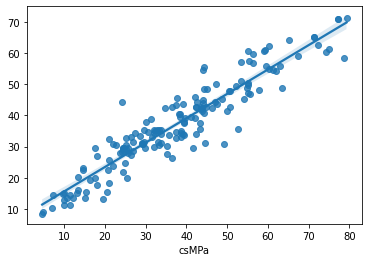

In [57]:
sns.regplot(y_test,rf_rscv_pred)

In [58]:
MAE = metrics.mean_absolute_error(y_test, rf_rscv_pred)   
print('MAE is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, rf_rscv_pred)
print('MSE for test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, rf_rscv_pred))
print('RMSE for test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,rf_rscv_pred)
print("R2 score for test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for test set is {}".format(adj_r_squared))

MAE is 4.888327279171193
MSE for test set is 38.68098017283866
RMSE for test set is 6.21940352227114
R2 score for test set is 0.8672404121748833
Adjusted R2 score for test set is 0.8604322281838517


#### RandomForestRegressor gave best RMSE so, proceeding to predect the test data with RandomForestRegressor

In [59]:
test=pd.read_csv('concrete_test.csv')
test.head()

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
1,109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
2,136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
3,88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
4,918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28


In [62]:
test.drop('Id',axis=1,inplace=True)

In [63]:
#Scaling the data
test_scale=pd.DataFrame(ss.fit_transform(test),columns=test.columns)

In [68]:
test.shape

(206, 8)

In [64]:
test_scale.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,-0.070383,0.503663,-0.913524,2.206702,-1.061722,-0.520172,-1.429574,4.330927
1,0.992599,1.402906,-0.913524,-0.733893,0.872479,-0.348138,-0.309136,-0.585978
2,1.293007,1.402906,-0.913524,-1.619334,2.606589,-0.348138,-0.309136,-0.297556
3,0.992599,1.402906,-0.913524,-0.733893,0.872479,-0.348138,-0.309136,-0.640915
4,-1.401861,-0.863186,1.891362,0.995046,0.272209,-1.983136,1.169109,-0.297556


In [65]:
predictions=rf.predict(test_scale)

In [66]:
predictions= pd.DataFrame(predictions, columns=['predictions']).to_csv('predictions.csv',index=False,header=False)